# Assignmnet 1

## A1 Part 1: Visualizing patterns in the data
In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.    


For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

In [9]:
# If  numpy, pandas and mathplotlib is not installed on the system uncomment these lines and run the code.
#%pip install numpy
#%pip install pandas
#%pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Helvetica'

In [7]:
# Reading the dataset from the downloaded file. 
# Assuming the the reader have the same file with the same name placed in the same folder as this notebook file.
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

In [8]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes = pd.Series(sorted(focuscrimes))

### Week-day plots

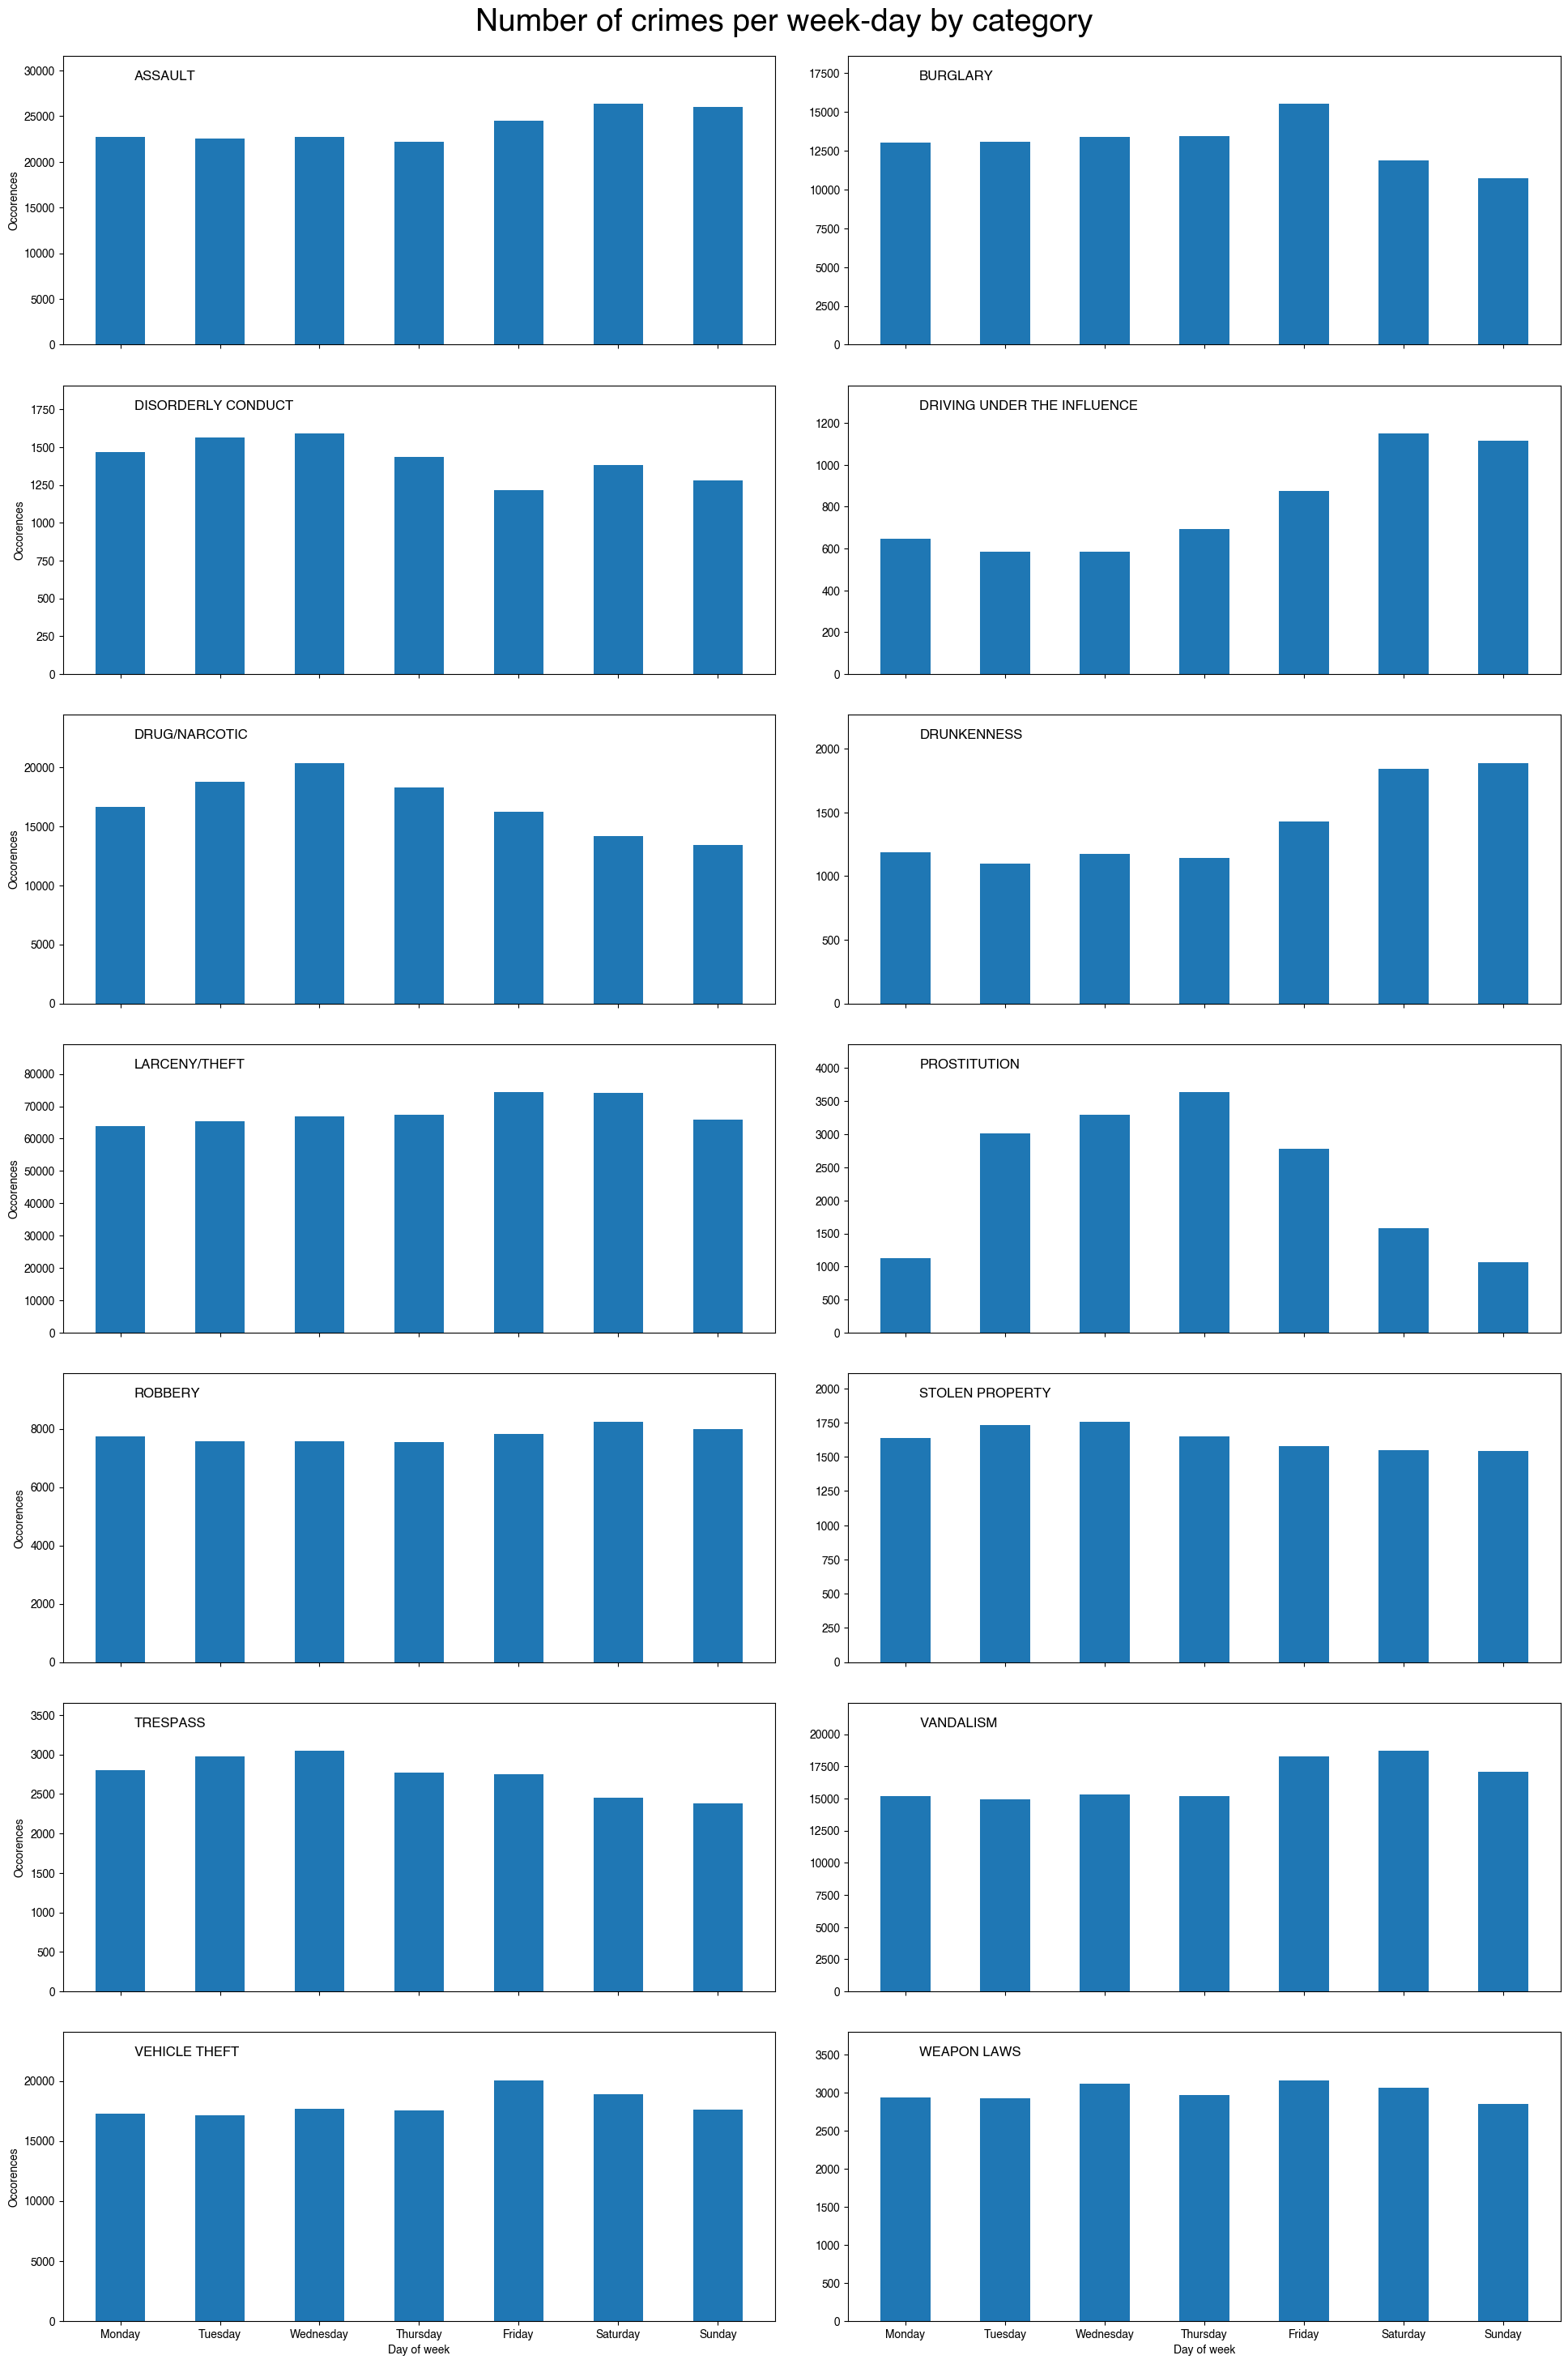

In [10]:
weekday_order = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per week-day by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    crime_counts_per_day = crime_data['DayOfWeek'].value_counts()#.sort_index() # count the crimes per week-day for this category
    
    crime_counts_per_day = crime_counts_per_day.reindex(sorted(crime_counts_per_day.index, key=lambda day: weekday_order[day])) # sort the in a normal week order

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_day.index, crime_counts_per_day.values, width=0.5) # add data to the chart (x,y)
    
    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Day of week')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.


### The months

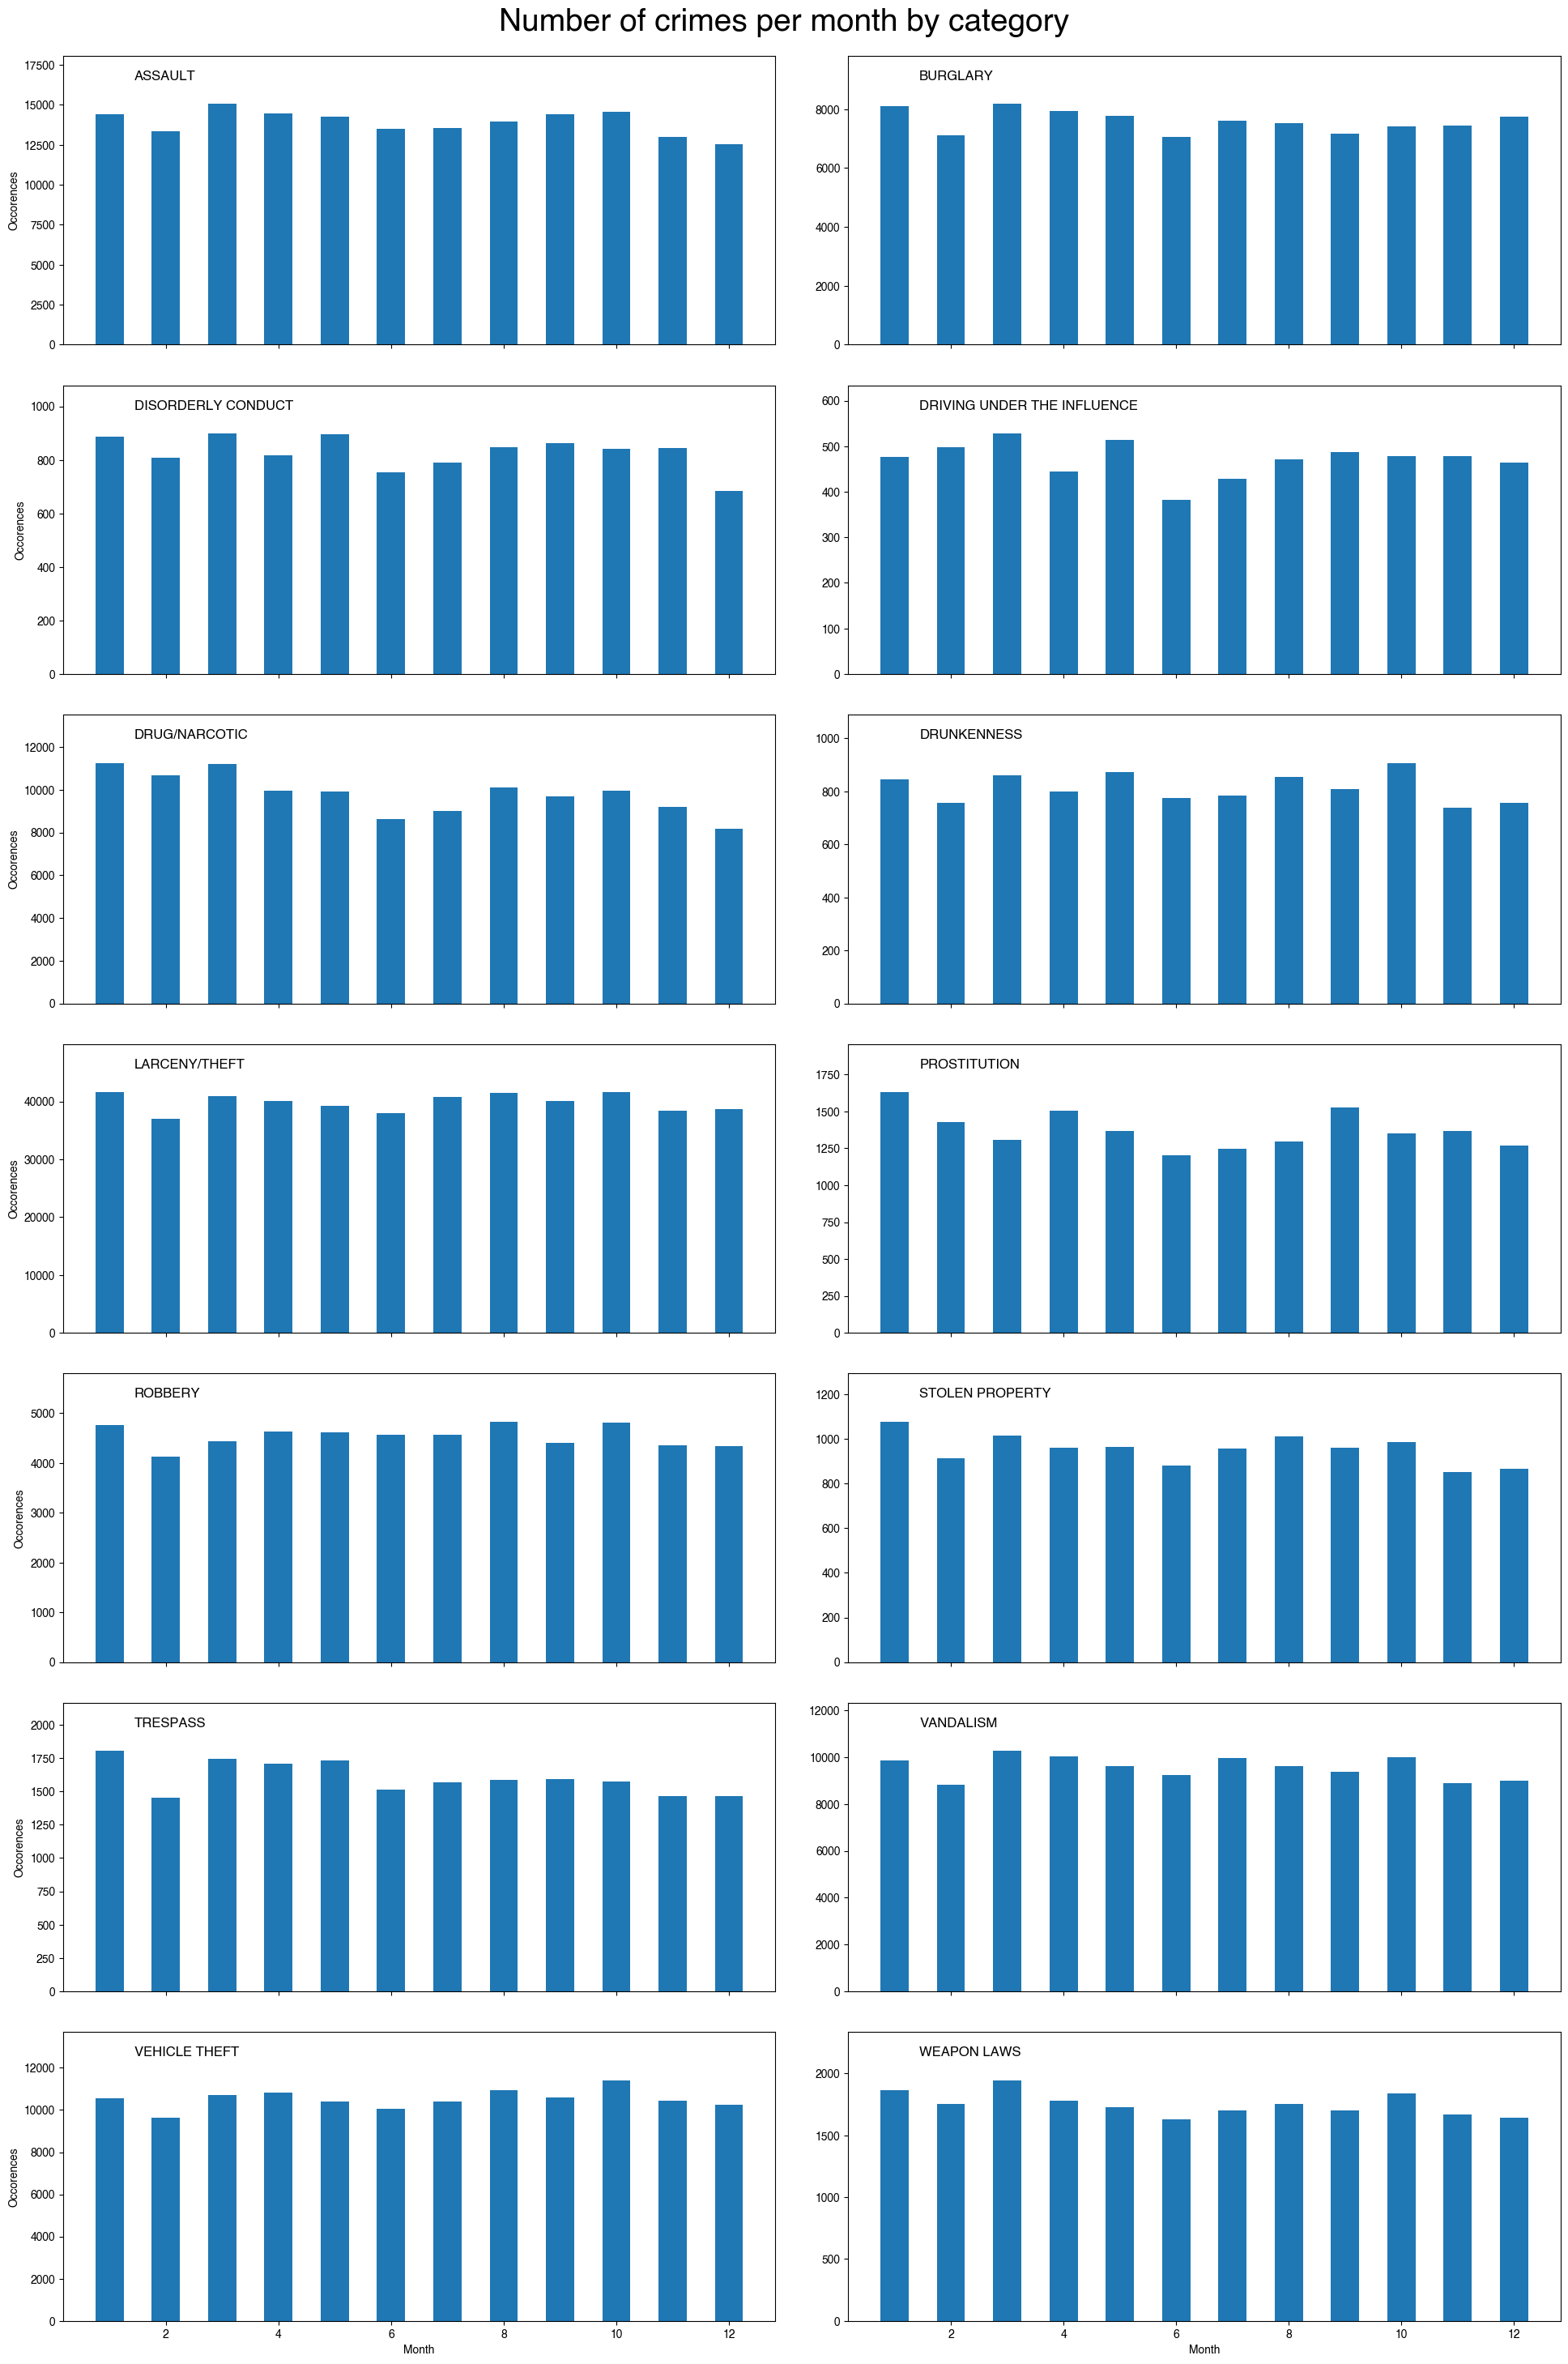

In [11]:
data['date'] = pd.to_datetime(data['Date'])
data['month'] = data['date'].dt.month

fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per month by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    crime_counts_per_month = crime_data['month'].value_counts().sort_index() # count the crimes per year for this category
    
    #crime_counts_per_day = crime_counts_per_day.reindex(sorted(crime_counts_per_day.index, key=lambda day: weekday_order[day])) # sort the in a normal week order

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_month.index, crime_counts_per_month.values, width=0.5) # add data to the chart (x,y)
    
    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Month')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.

### The 24-hour cycle

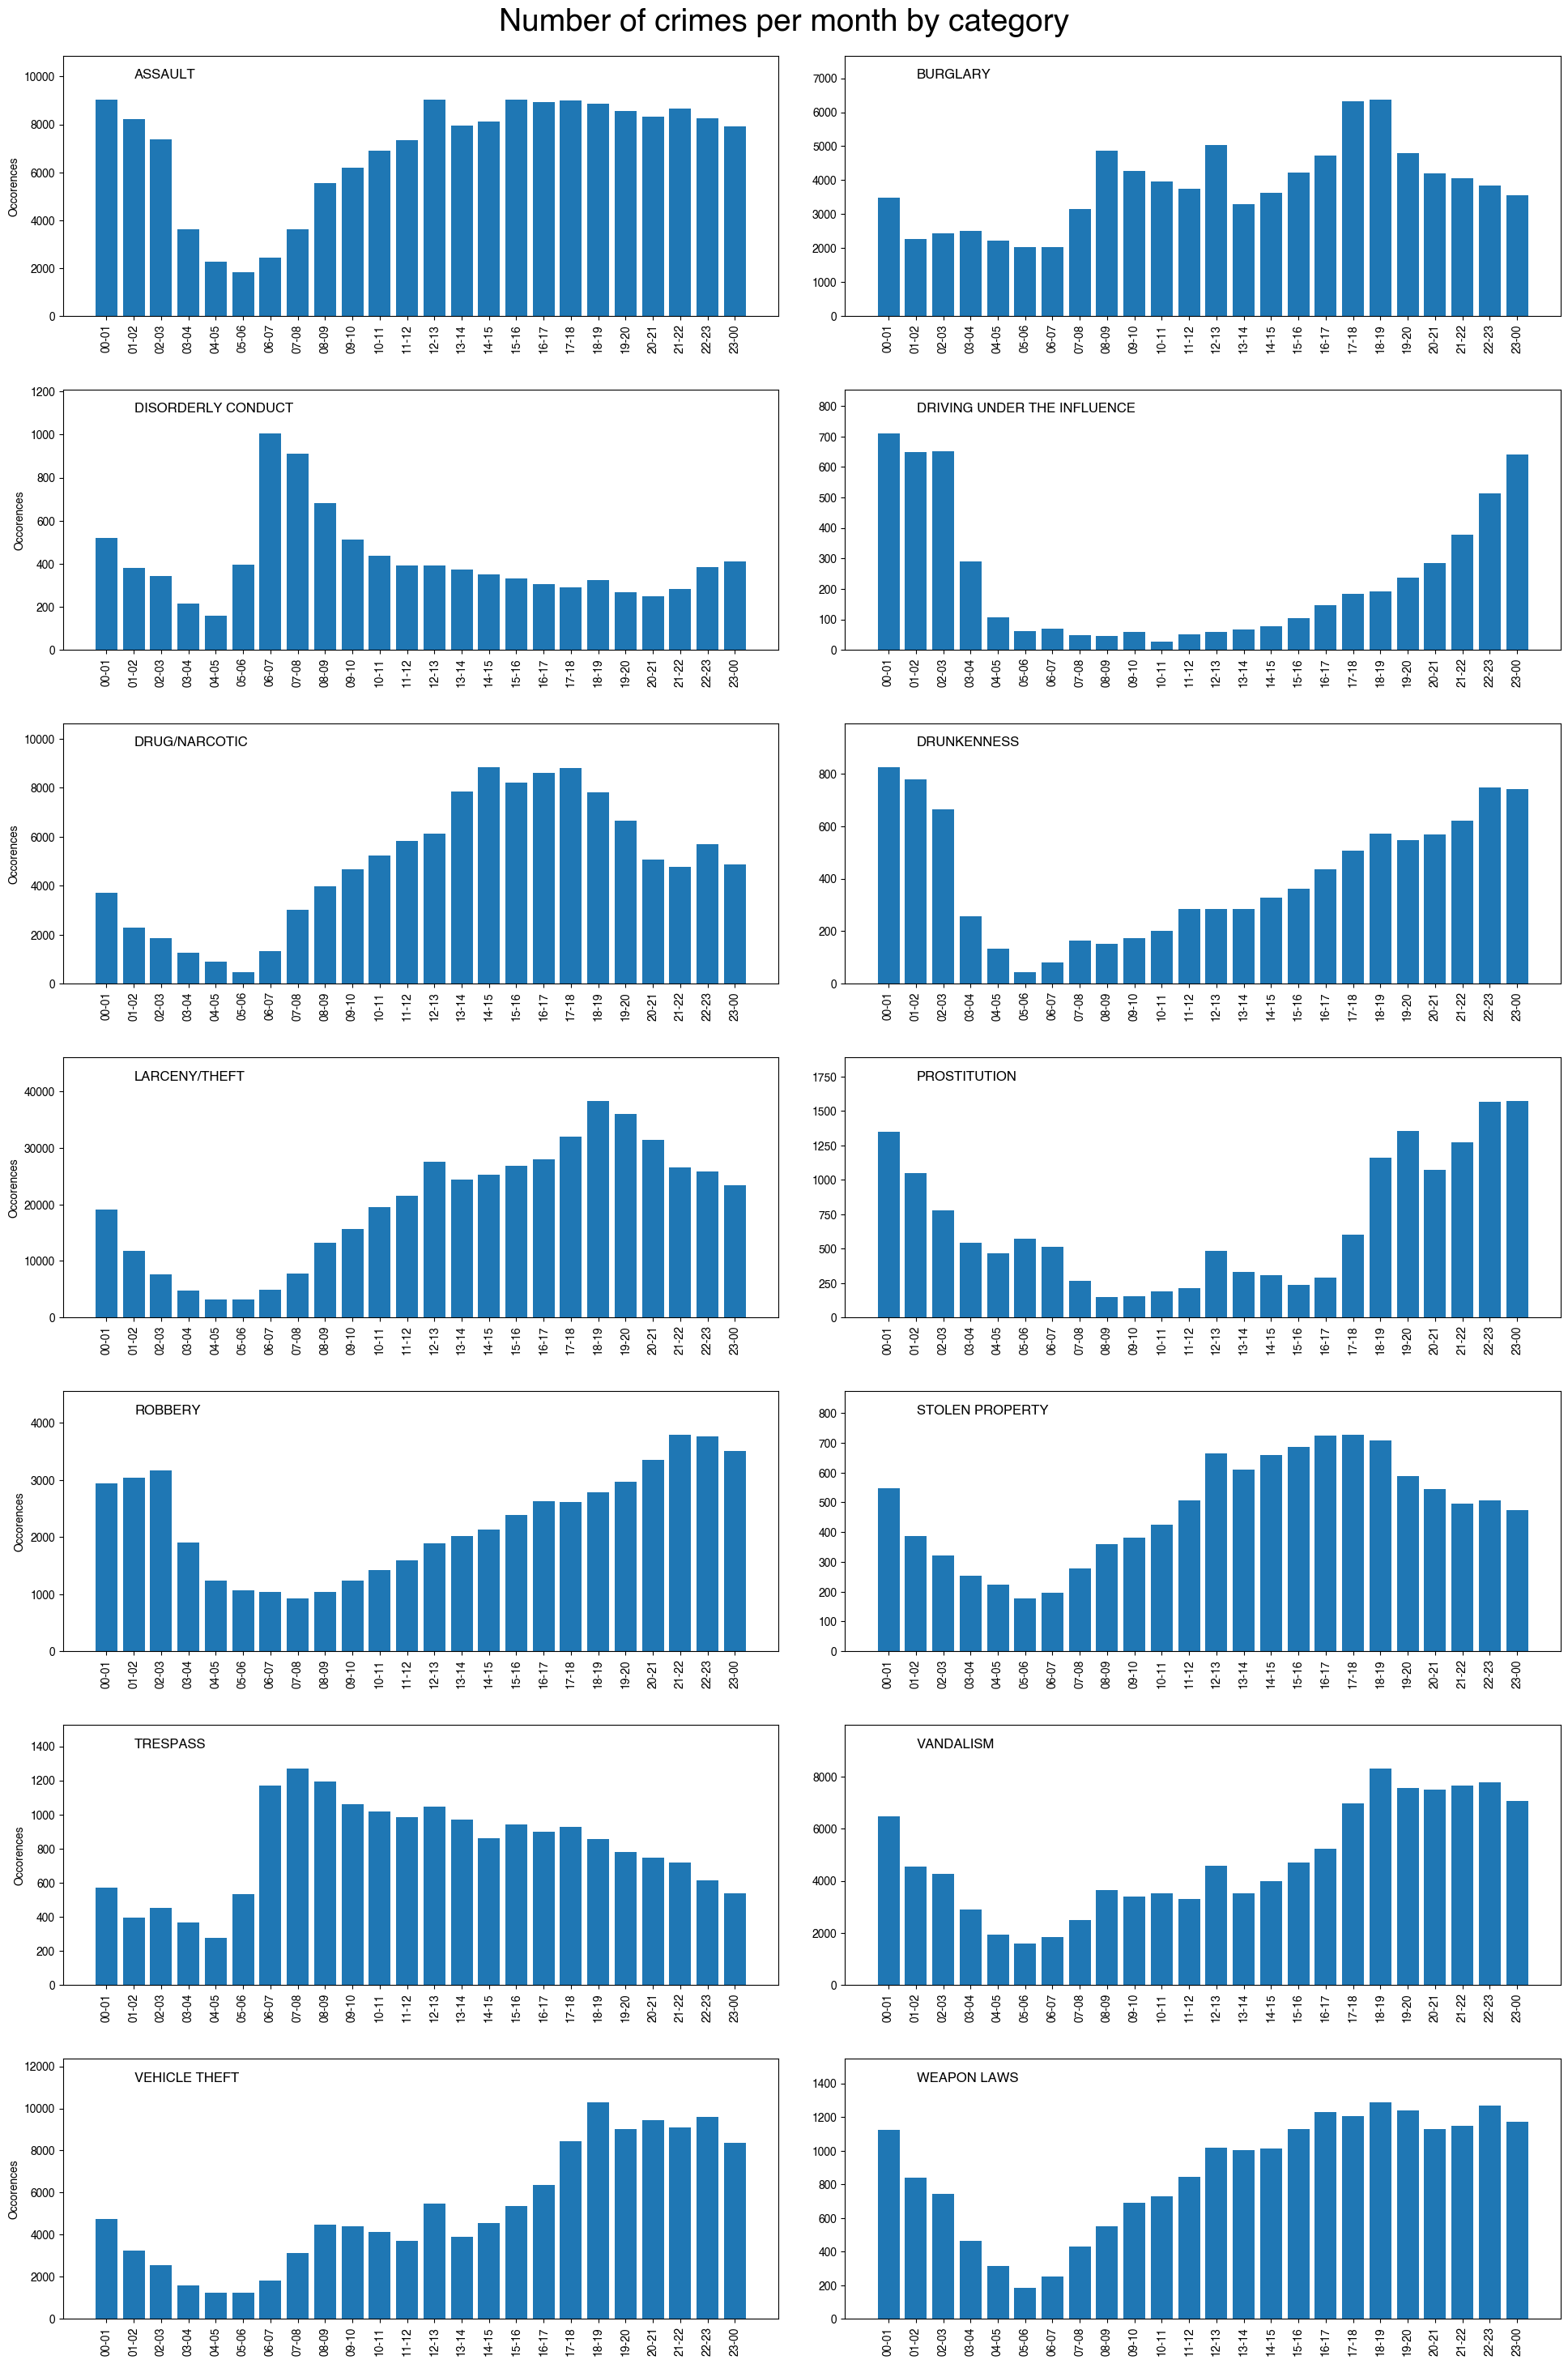

In [12]:
data['hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per month by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    #crime_counts_per_time = crime_data['time_numerical'].value_counts().sort_index() # count the crimes per year for this category
    
    crime_counts_per_hour = crime_data.groupby('hour').size()
    crime_counts_per_hour = crime_counts_per_hour.reindex(range(24), fill_value=0)
    


    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_hour.index, crime_counts_per_hour.values) # add data to the chart (x,y)
    
    ax.set_xticks(range(24))  # Set ticks for each hour
    ax.set_xticklabels([f'{hour:02d}-{(hour+1)%24:02d}' for hour in range(24)], rotation=90)  # Format labels as 'HH-HH'


    # add / remove years and years-title on all or the last 2
    #ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Time')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.

### 168 hours of the week

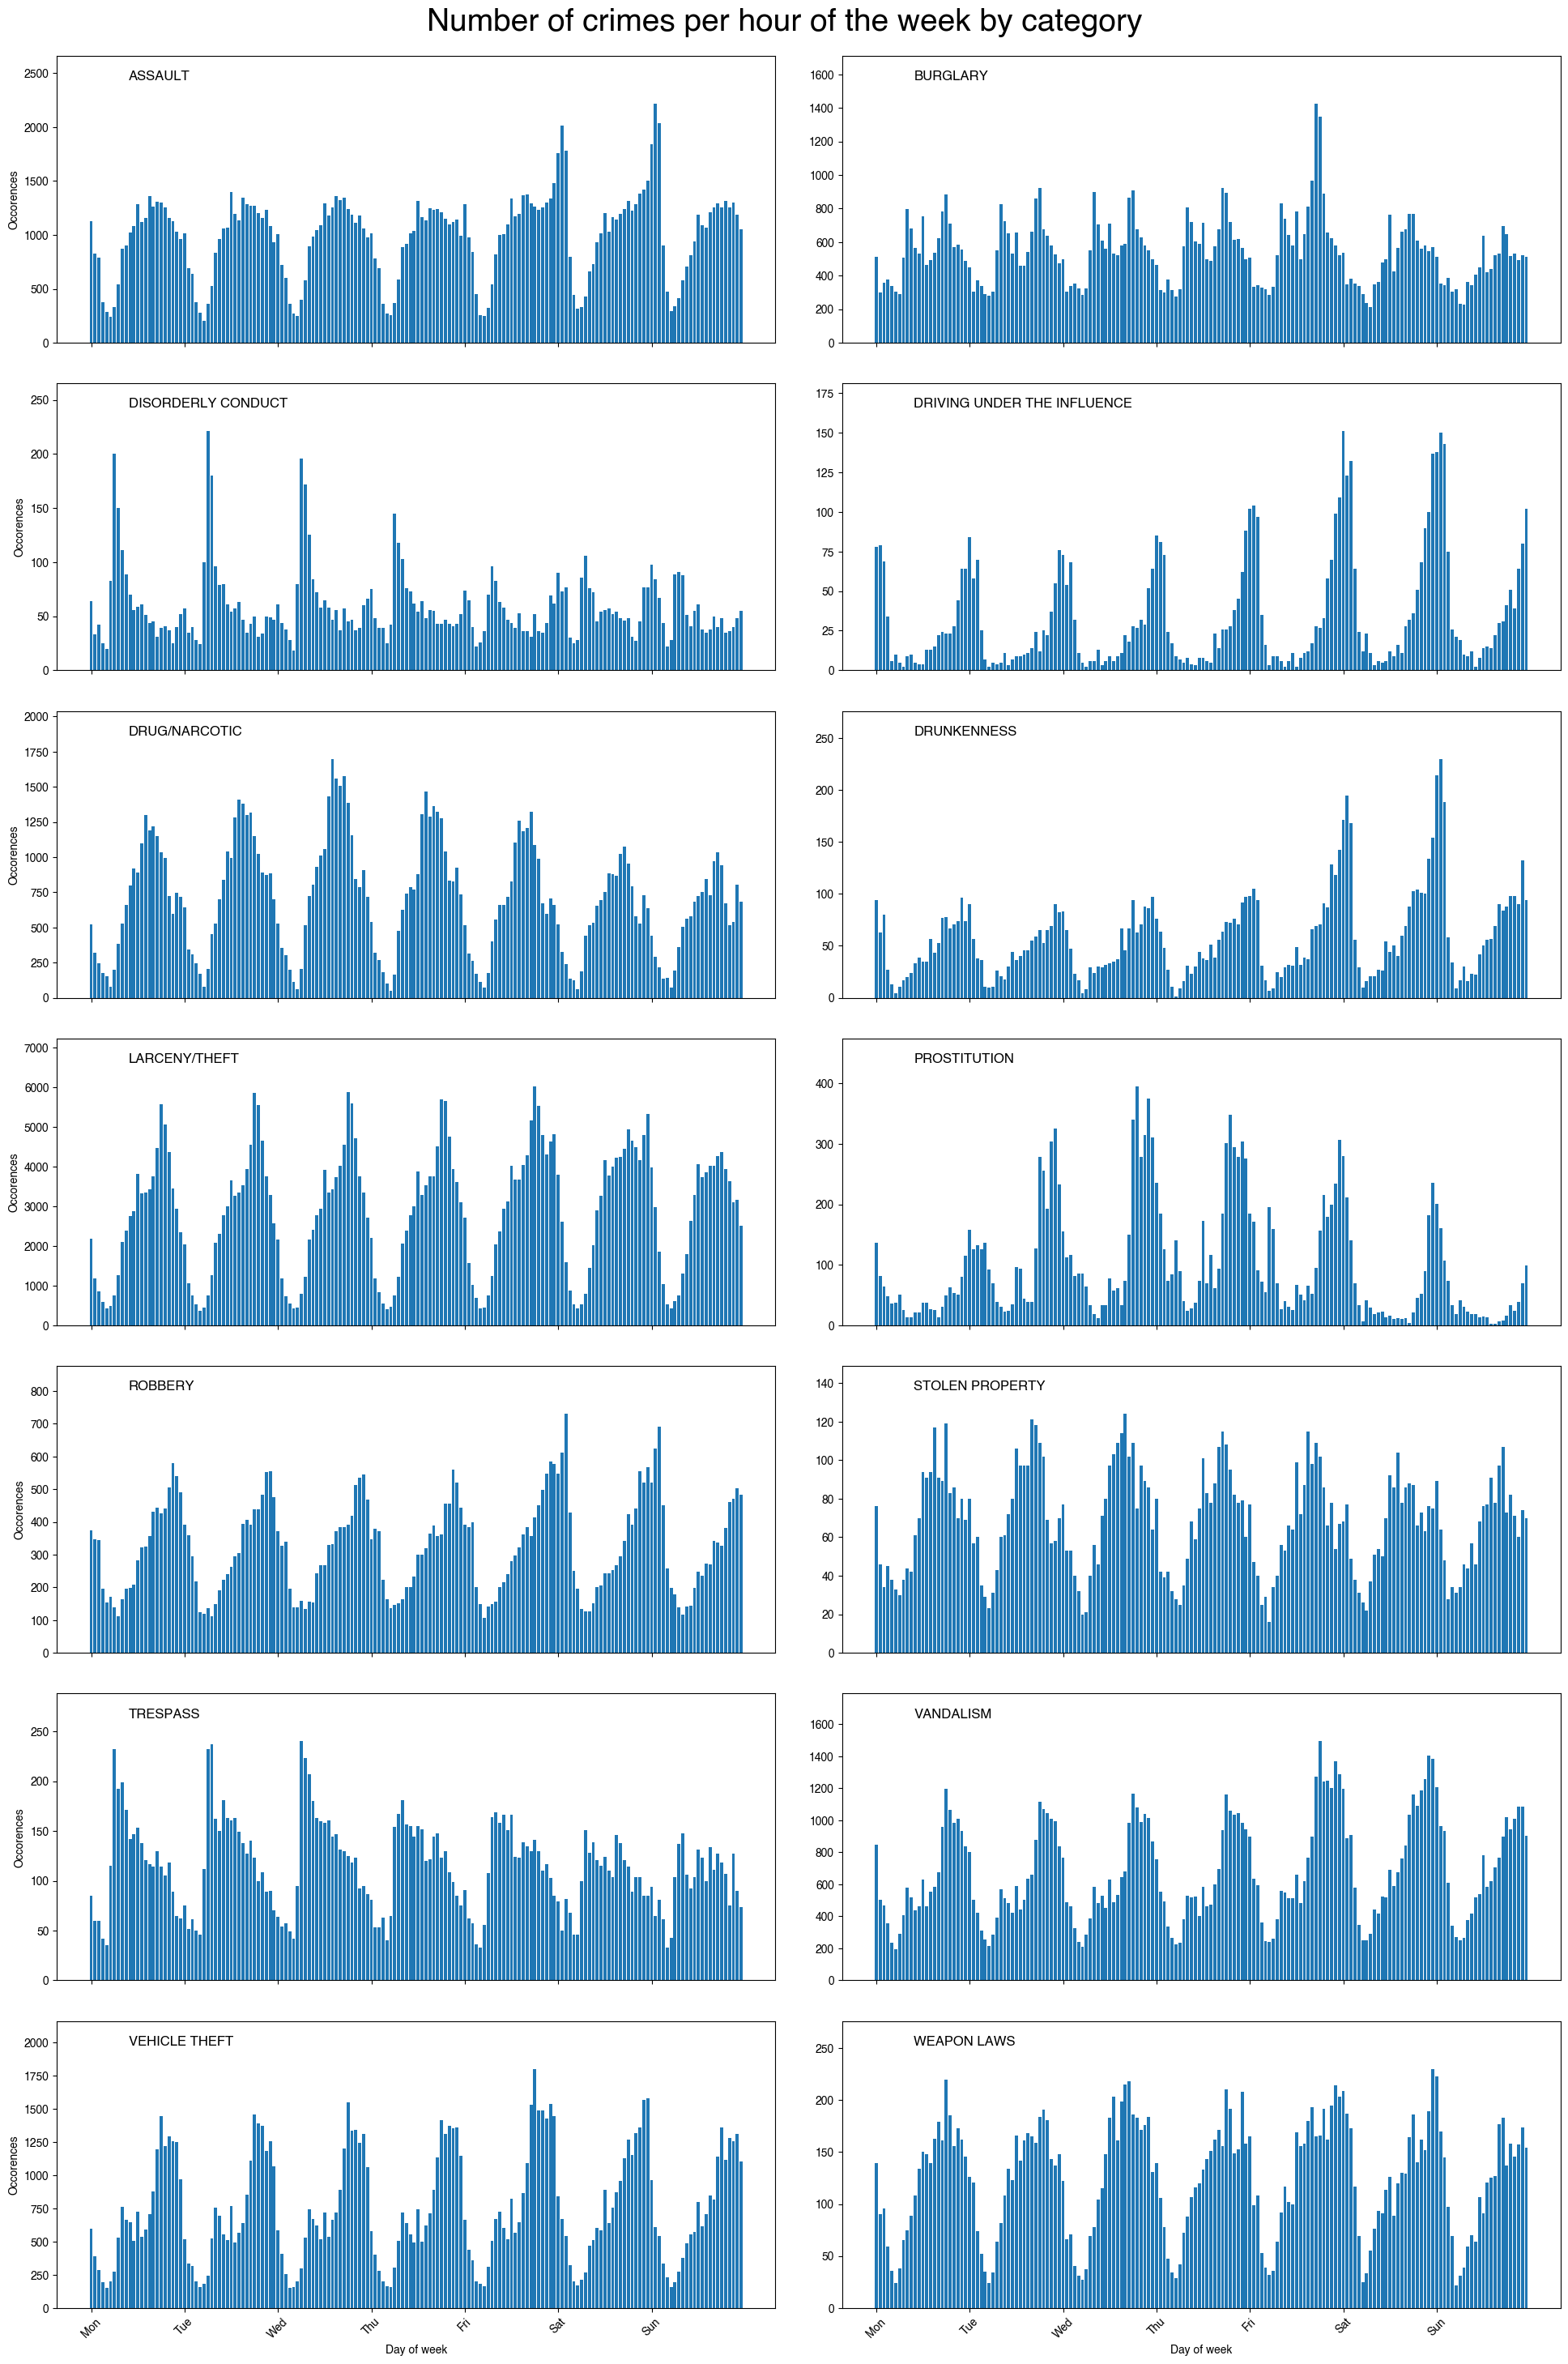

In [13]:
weekday_order = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

data['day_num'] = data['DayOfWeek'].map(weekday_order)
data['hour_of_week'] = data['day_num'] * 24 + data['hour']

fig = plt.figure(figsize=(20, 30))  # create a figure (canvas like)
fig.suptitle('Number of crimes per hour of the week by category', fontsize=28) # add the main title to the figure on top of all plots

for i, category in enumerate(focuscrimes, start=1):

    crime_data = data[data['Category'] == category] # filter the dataset by category    
    
    crime_counts_per_hour_of_week = crime_data.groupby('hour_of_week').size()
    crime_counts_per_hour_of_week = crime_counts_per_hour_of_week.reindex(range(168), fill_value=0)

    # add the data to a subplot
    ax = fig.add_subplot(len(focuscrimes)//2, 2, i) # specify how many rows in the axes in the figure, how many collums (2), and which number of the total the specific plot is 
    
    ax.margins(y=0.2) # margin from bars to top of the axes 
    ax.text(0.1, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12) # add title text inside the axes
    ax.bar(crime_counts_per_hour_of_week.index, crime_counts_per_hour_of_week.values) # add data to the chart (x,y)
    
    ax.set_xticks(range(0, 168, 24))  # Set ticks for the start of each day
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)  # Days of the week

    # add / remove years and years-title on all or the last 2
    ax.set_xticklabels([]) if i < len(focuscrimes)-1 else ax.set_xlabel('Day of week')

    if i % 2 != 0:
        ax.set_ylabel('Occorences')  # y-label on all plots in the left row only

plt.tight_layout(pad=3.0)  # Adjusts the subplots to fit into the figure area. pad adds space between fig title and the sup charts
plt.show()  # Display the figure with the subplots.

* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.
* Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).

## A1 Part 2: Dataviz questions 

**Question: What is the difference between data and metadata? How does that relate to the GPS tracks-example?**    
> Data refers to the primary information collected, representing the main subject of interest. Metadata, by contrast, is data about data, providing essential context and descriptions that help to understand and use the data more effectively.
>  
> In the context of the GPS tracks example, the data is specified in the \<trkpt\> section of the XML file. It includes latitude, longitude, and timestamp information. The metadata is primarily contained within the \<metadata\> section of the XML file. This includes information such as a <link> tag to the Garmin Connect platform, and a \<time\> tag probably specifying an update time or the like of the device used to track the data.


Q: **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.**    
> When we talk about data analysis, the eye is an excellent tool for recognizing patterns such as detecting outliers, trends, and correlations in visual data. Our eyes are biologically designed for this pattern recognition, and we can utilize this ability to perform ultra-fast pattern recognition tasks, such as comparing the sizes of two boxes or the height of bars in a bar chart.  
  
Q: **Mention something that the human eye is very good at.**      
> If we have a large dataset, count related data and put it into visual boxes it becomes an easy task for the eye to detect wich one is largest or which one is double size of the other and so on.

Q: **Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.**    
> When what we look at becomes detailed it is gennerally more difficult for the eye to grasp. The concept can be described as [visual crowding](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070834/). So, highly detailed charts with numerous data points, overlapping lines, and minimal contrast. Elements that are too small, too similar in color, or too densely arranged is complicated for the eye to grasp.
> Another problem could occour with optical illutions. WRITE MORE!

**Q: Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**    
> A fomal description of the Simpson's paradox kan be found here: "Simpson’s Paradox is a statistical phenomenon where an association between two variables in a population emerges, disappears or reverses when the population is divided into subpopulations. For instance, two variables may be positively associated in a population, but be independent or even negatively associated in all subpopulations." - https://plato.stanford.edu/entries/paradox-simpson/    
> An example of this could be a poll about some policys popularity:
  * Urban Regions:
    * 1000 respondents in total.
        * Women: 300 respondents.
          * 180 support the policy (60% of women).
        * Men: 700 respondents.
          * 280 support the policy (40% of men).
  * Countryside Regions:
    * 1000 respondents in total.
      * Women: 700 respondents.
          * 140 support the policy (20% of women).
      * Men: 300 respondents.
          * 240 support the policy (80% of men).

  At first glance, it may seem that women are more likely to support the policy in Urban areas and less likely in Contryside areas, with the opposite trend for men.

  But if we combine the areas we get:

  * Total Respondents: 2000
    * Total Women: 1000 (300 Urban + 700 Rural)
      * Support the policy: 320 (180 from Urban + 140 from Rural) = 32% of women
    * Total Men: 1000 (700 Urban + 300 Rural)
      * Support the policy: 520 (280 from Urban + 240 from Rural) = 52% of men

In Urban areas, more women than men support the policy, while in Contryside areas, men's support is higher. Yet, combining the data, due to gender distribution across regions, misleadingly shows men as more supportive overall, reversing the regional trends.

Q: **In your own words, explain the differnece between exploratory and explanatory data analysis.**    
>  **Exploratory Data Analysis**    
> The purpose of Exploratory Data Analysis is to gain a broad overview of the domain. A simple example of this could be using the ```head()``` function on a DataFrame, ```df.head()```, to get an overview of the columns and data in the dataset.        
>
> **Explanatory Data Analysis**    
> This process is about explaining the data or delivering a message based on your interpretation of what the data is indicating. Taking our 'SF crime dataset' as an example, we exemplify this when we analyze the 'Number of crimes per weekday by category' and plotted it out in 14 bar charts. 

## Contributions
I have not been in a group for this forst assignment and have therefore dome all work on my own. 